In [2]:
import cv2
from cv2 import sqrt
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics


In [3]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

In [4]:
DeleteTrash(r"./BallDetectorLog48videoCycles.txt") 
FindCord = np.loadtxt(r"./BallDetectorLog48videoCycles.txt")

BlenderCord = np.loadtxt(r"./LogBlenderCoordVideo48.txt", delimiter=',')
#BlenderCord[:,2] = BlenderCord[:,2] +  0.05

if (FindCord.shape != BlenderCord.shape):
    print("Error dementions")
    print(FindCord.shape)
    print(BlenderCord.shape)
    
cameraMatrix = np.array( [ 
    [2666.6666666666665, 0, 960.0],
    [0, 2666.6666666666665, 540.0], 
    [0, 0, 1] 
    ] )
cameraMatrixV2 = np.array( [
    [2666.6666666666665, 0, 959.5],
    [0, 2666.6666666666665, 539.5], 
    [0, 0, 1] 
    ] )
distCoeffs = np.array( [ 0.0,0.0,0.0,0.0 ] )
Rx = np.array([
    [ -1.0, 0.0, 0.0],
    [ 0.0, -1.0, 0.0],
    [ 0.0, 0.0, 1.0] 
    ])# Rotation matrix
T = np.array([ 0.0, 0.0, 0.0]) #Transpose matrix

rvecR, jacobianRotation = cv2.Rodrigues(Rx)

In [5]:
# создаем функцию распределения
def distribution_function(x,values):
    count = 0
    for i in values:
        if i <= x:
            count += 1
    return count / len(values)
def ErrorEstimation(FindCord, BlenderCord, rvecR, T, cameraMatrix, distCoeffs, draw=False):
    xErrorFindCord = FindCord[:,0] - BlenderCord[:,0]
    yErrorFindCord = FindCord[:,1] - BlenderCord[:,1]
    zErrorFindCord = FindCord[:,2] - BlenderCord[:,2]

    imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
    imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
    pixelError = imageBlenderPoint - imageFindPoint
    xErrorValuesPx = pixelError[:,0,0]
    yErrorValuesPx = pixelError[:,0,1]

    print ("xyz Real cordinate mean: ")
    print (np.mean(xErrorFindCord))
    print (np.mean(yErrorFindCord))
    print (np.mean(zErrorFindCord))
    print("------------------")
    print("Px cordinate mean")
    print(np.mean(xErrorValuesPx))
    print(np.mean(yErrorValuesPx))
    print(" ")
    print("max px error: x = ", max(abs(xErrorValuesPx)), " y = ", max(abs(yErrorValuesPx)), '\n')
    #print ("Statistics mean:  ", statistics.mean(xErrorValuesPx), " error in px " ) 
    Sigma = statistics.stdev(xErrorValuesPx)
    print ("Statistics stdev:  ", Sigma, " error in px" )
    if draw:
        plt.plot(xErrorFindCord, label = 'x error')
        plt.plot(yErrorFindCord, label = "y error")
        plt.plot(zErrorFindCord, label = "z error")
        plt.legend()
        plt.xlabel('Frame')
        plt.ylabel('Error in meters')
        plt.title(" Real cordinate error")
        plt.show()

        plt.plot(xErrorValuesPx, label = "X px error")
        plt.plot(yErrorValuesPx, label = "Y px error")
        plt.xlabel('Frame')
        plt.ylabel('Error in px')
        plt.legend()
        plt.show()

        plt.hist(xErrorFindCord,alpha = 0.5, bins= 21, label="x real cord")
        plt.hist(yErrorFindCord,alpha = 0.5, bins= 21, label="y real cord")
        plt.hist(zErrorFindCord,alpha = 0.5, bins= 21, label="z real cord")
        plt.legend()
        plt.show()

        plt.hist(xErrorValuesPx,alpha = 0.5, bins= 21,label="x px")
        plt.hist(yErrorFindCord,alpha = 0.5, bins= 21, label="y px")
        plt.legend()
        plt.show()



        # создаем список значений для построения графика
        x_values = np.arange(0, 1, 0.05)
        y_values = [distribution_function(x,abs(xErrorValuesPx) ) for x in x_values]
        # строим график
        plt.plot(x_values, y_values, label = 'x')
        y_values = [distribution_function(x,abs(yErrorValuesPx) ) for x in x_values]
        plt.plot(x_values, y_values, label = "y")

        # добавляем подписи к графику
        plt.xlabel('px error')
        plt.ylabel('Функция распределения')
        plt.title('График функции распределения')
        plt.legend()
        # выводим график на экран
        plt.show()



## Some results

- ---
- ---

xyz Real cordinate mean: 
0.004782057822917584
0.010227438005378372
0.11917715873015852
------------------
Px cordinate mean
0.4855025737958028
0.48090077850944696
 
max px error: x =  0.6968196098926001  y =  0.7041380861970765 

Statistics stdev:   0.09586254931876349  error in px


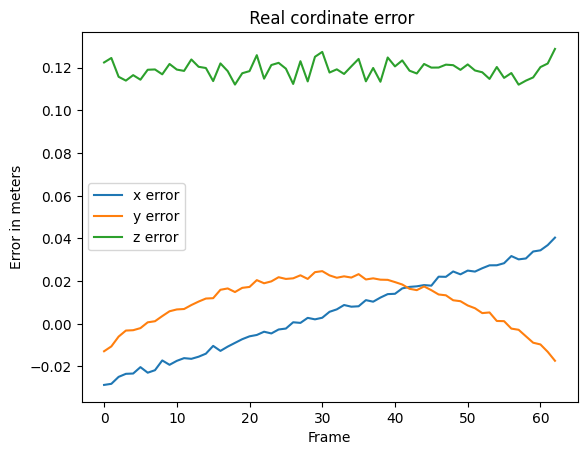

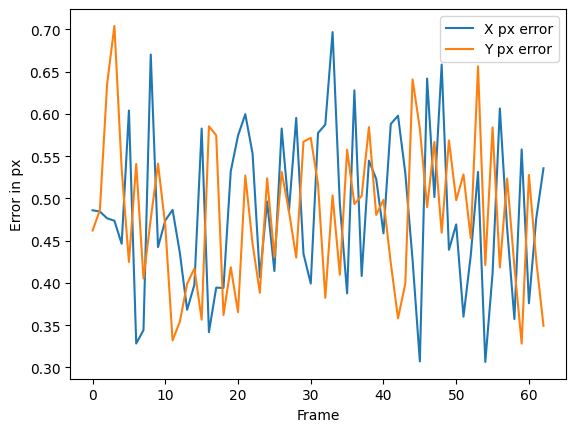

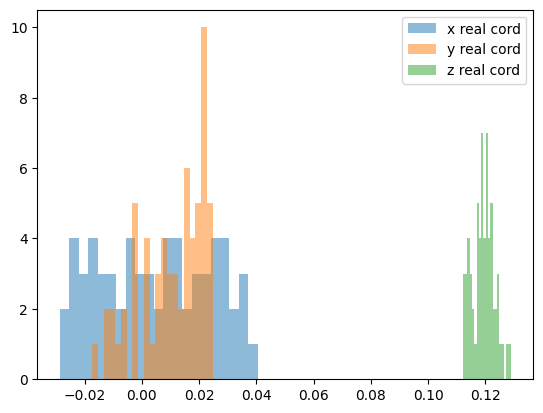

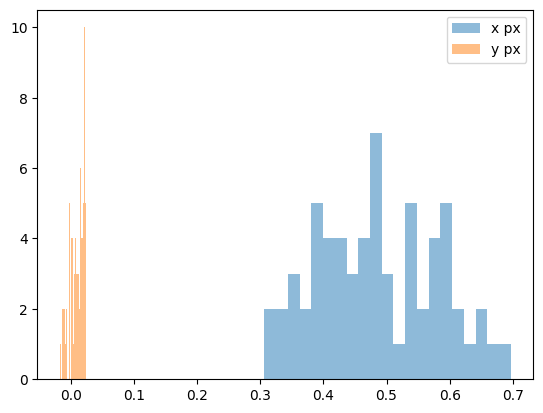

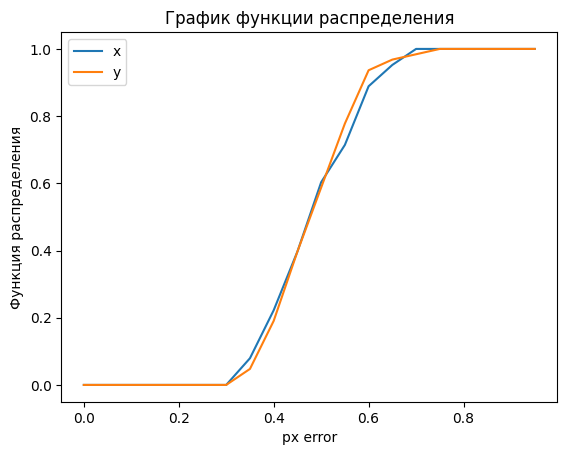

In [6]:
DeleteTrash(r"./BallDetectorLog63video.txt") 
FindCord63 = np.loadtxt(r"./BallDetectorLog63video.txt")
BlenderCord63  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63, BlenderCord63,rvecR,T,cameraMatrix,distCoeffs,draw=bool)

xyz Real cordinate mean: 
0.004858029981647725
0.005166200386330741
0.008226857142856899
------------------
Px cordinate mean
0.5025188743486633
0.5069169323149232
 
max px error: x =  0.6606978611800969  y =  0.6266061043929199 

Statistics stdev:   0.0640523718454642  error in px


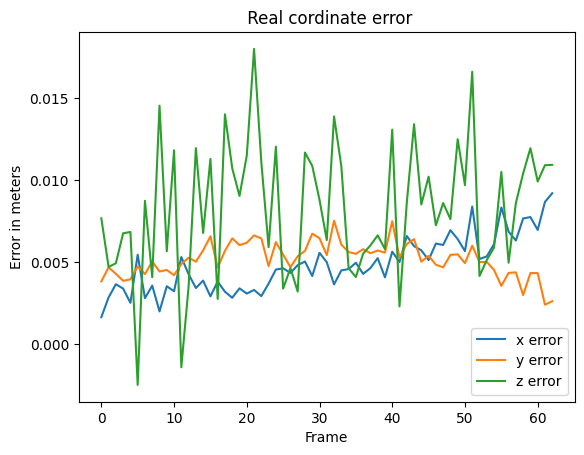

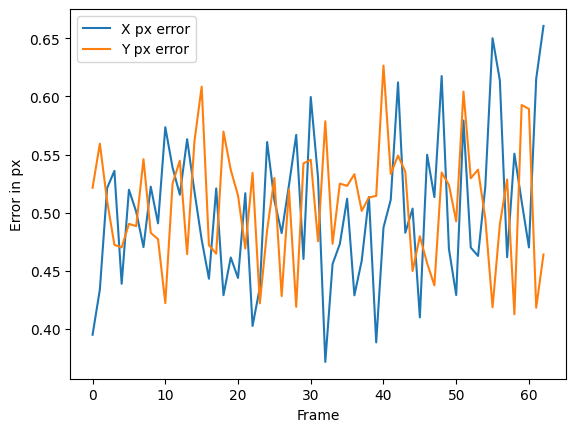

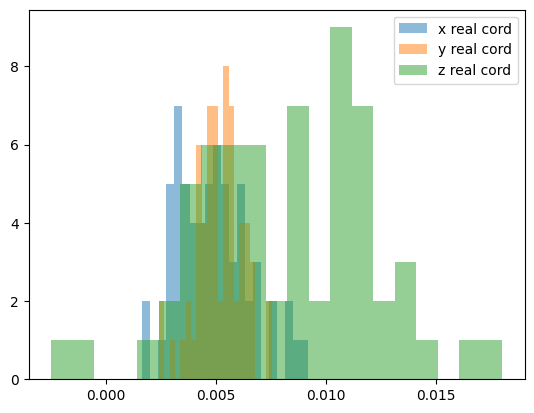

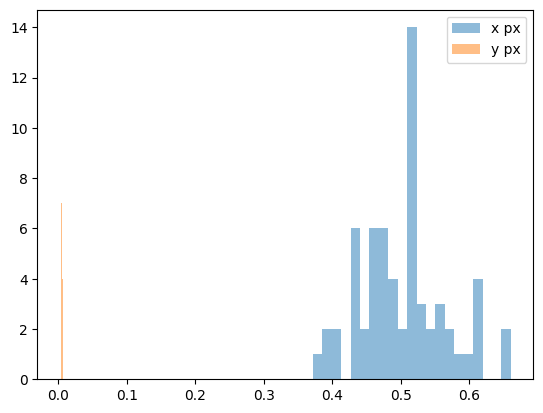

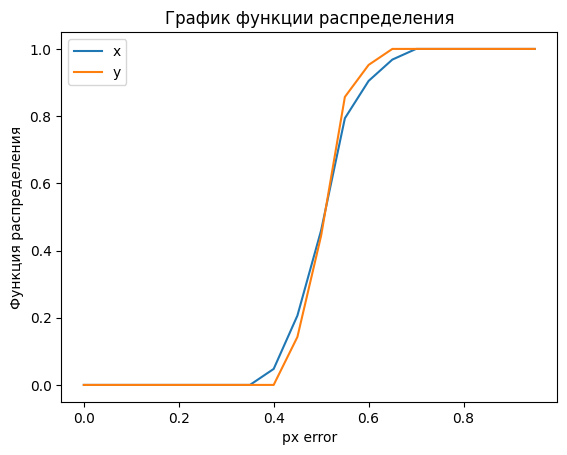

In [7]:
DeleteTrash(r"./BallDetectorLogSoftColorFilter63Framef.txt") 
FindCord63 = np.loadtxt(r"./BallDetectorLogSoftColorFilter63Framef.txt")
BlenderCord63  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63, BlenderCord63,rvecR,T,cameraMatrix,distCoeffs,draw=bool)

xyz Real cordinate mean: 
0.005118372695933431
0.011651591338711667
0.13907606349206356
------------------
Px cordinate mean
0.48629505107365073
0.5147112580255954
 
max px error: x =  0.686304429695042  y =  0.7033121088375083 

Statistics stdev:   0.11619825246900696  error in px


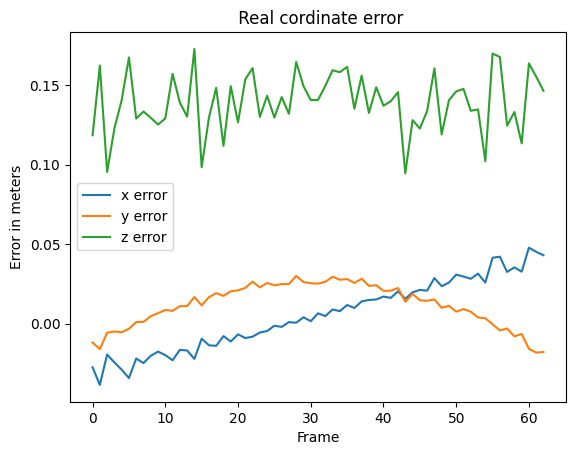

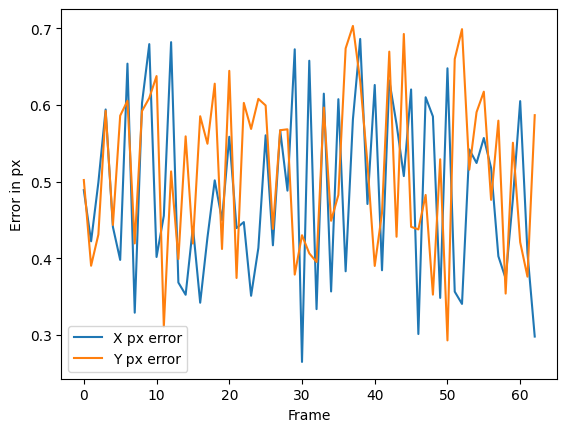

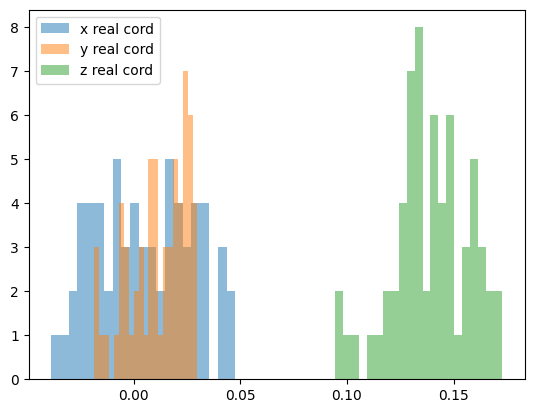

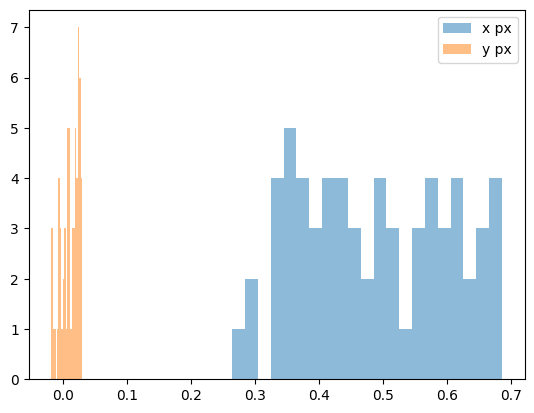

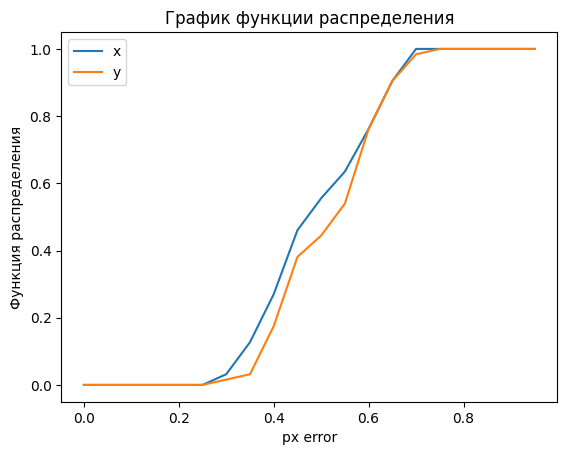

In [8]:
DeleteTrash(r"./BallDetectorLogSoftColorFilter63FramefV2.txt") 
FindCord63 = np.loadtxt(r"./BallDetectorLogSoftColorFilter63FramefV2.txt")
BlenderCord63  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63, BlenderCord63,rvecR,T,cameraMatrix,distCoeffs,draw=bool)